In [47]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('seaborn version:', sns.__version__)

pandas version: 1.4.4
numpy version: 1.26.0
seaborn version: 0.11.2


In [3]:
# Import dataset
housing_df = pd.read_csv('Housing.csv')

In [4]:
# Display shape of dataset
housing_df.shape

(545, 13)

In [5]:
# Display dtypes
housing_df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
# Show first 5 lines
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# display summary statistics
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# Display summary statistics for categorical variables
housing_df.describe(include=['O'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [9]:
# Verify if there is missing data
housing_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

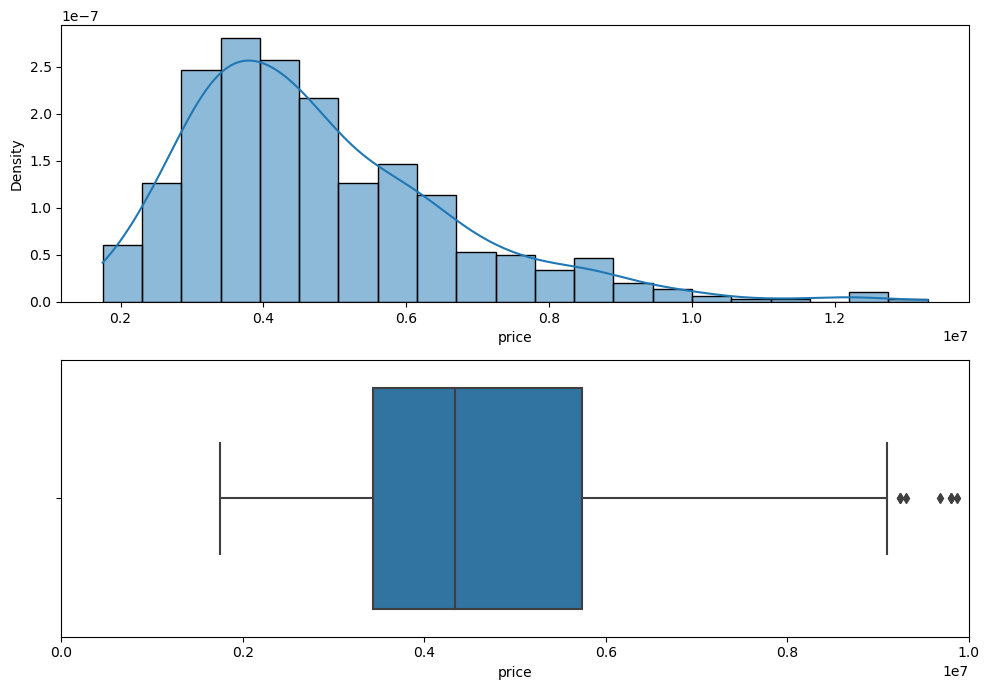

In [10]:
# Visualize density distribution of price
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(housing_df['price'], kde=True, stat='density')
fig.add_subplot(2,1,2)
sns.boxplot(data= housing_df, x='price')
plt.xlim(0, 10000000)
plt.tight_layout();

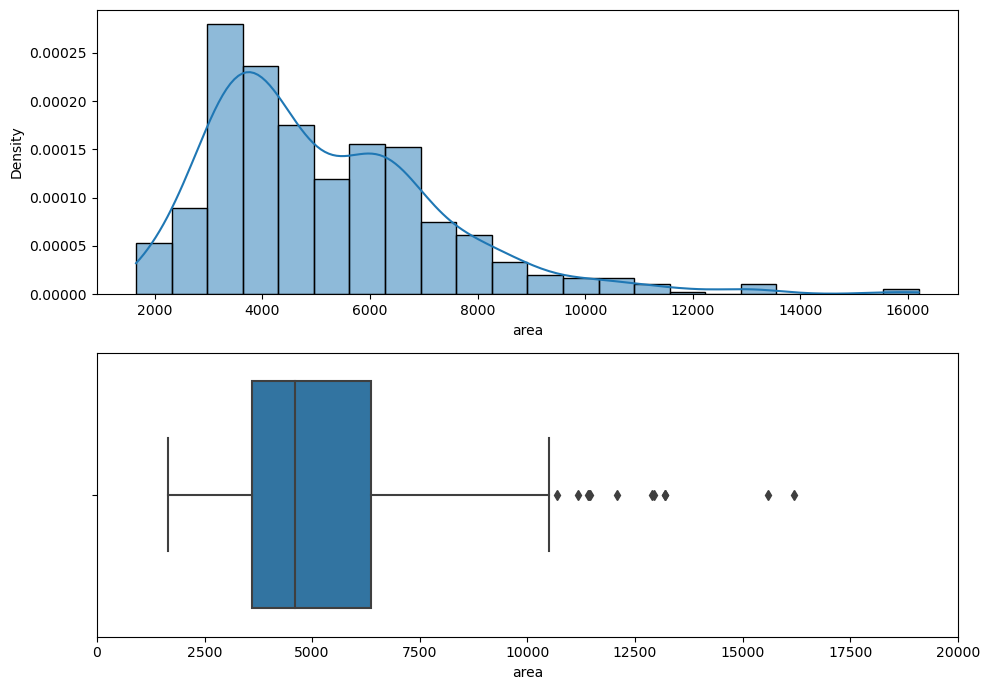

In [51]:
# Visualize density distribution of area and for outliers
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(housing_df['area'], kde=True, stat='density')
fig.add_subplot(2,1,2)
sns.boxplot(data= housing_df, x='area')
plt.xlim(0, 20000)
plt.tight_layout();

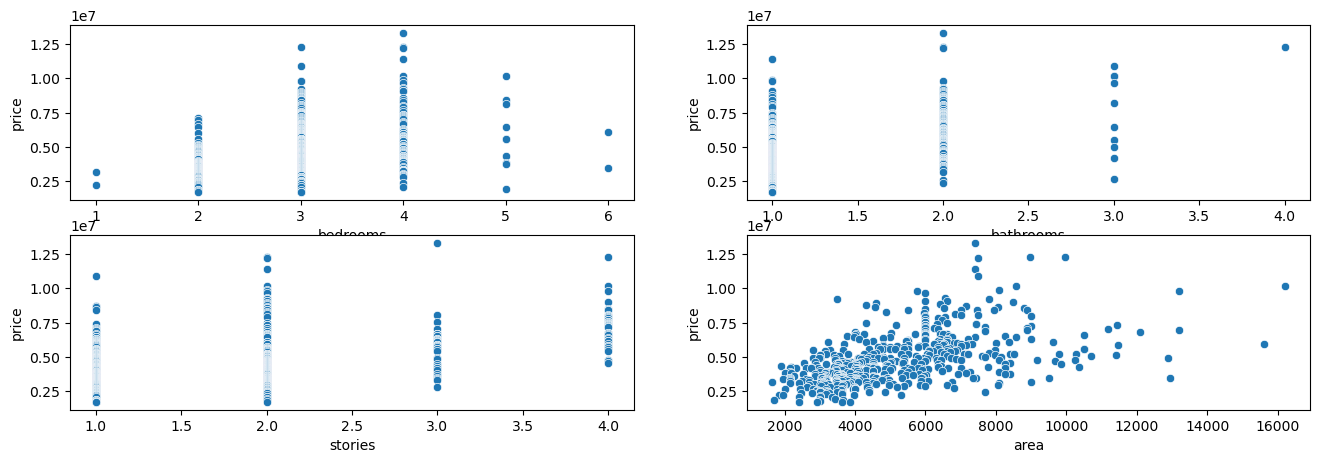

In [11]:
# Compare distribution of price vs various features
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(data=housing_df,x='bedrooms', y='price')
fig.add_subplot(2,2,2)
sns.scatterplot(data=housing_df,x='bathrooms', y='price')
fig.add_subplot(2,2,3)
sns.scatterplot(data=housing_df,x='stories', y='price')
fig.add_subplot(2,2,4)
sns.scatterplot(data=housing_df,x='area', y='price');

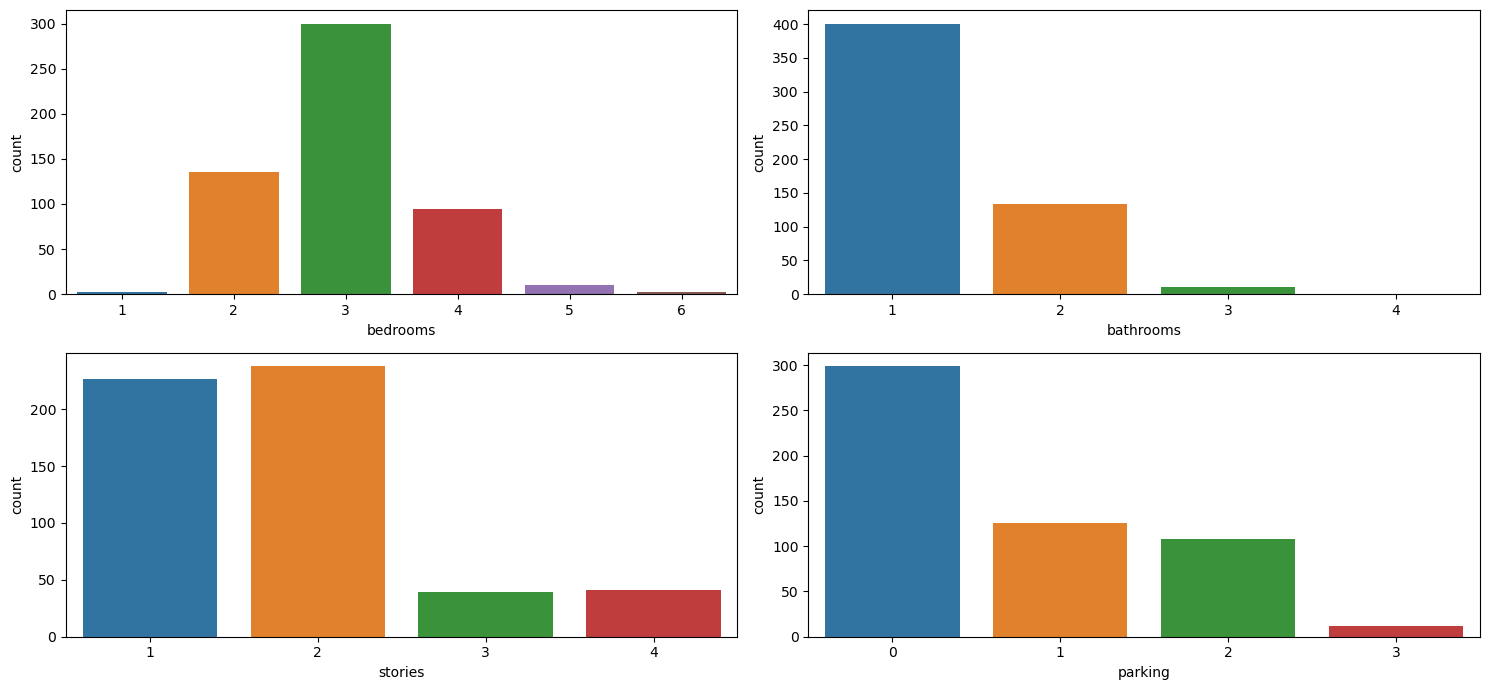

In [12]:
# Show count of various features
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(data=housing_df, x='bedrooms')
fig.add_subplot(2,2,2)
sns.countplot(data=housing_df, x='bathrooms')
fig.add_subplot(2,2,3)
sns.countplot(data=housing_df, x='stories')
fig.add_subplot(2,2,4)
sns.countplot(data=housing_df, x='parking')
plt.tight_layout()

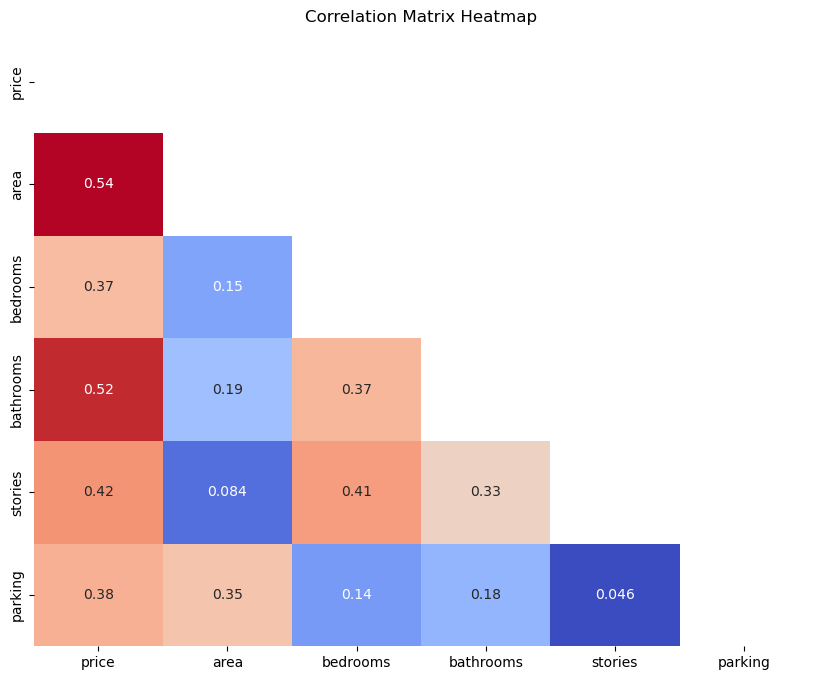

In [13]:
# Create the correlation matrix
correlation_matrix = housing_df.corr()
# Define mask object for heatmap
mask=np.triu(np.ones_like(correlation_matrix))
# Create the heatmap
plt.figure(figsize=(10, 8)) # Set the figure size
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
cbar=False)
13
# Set title
plt.title('Correlation Matrix Heatmap')
# Display the plot
plt.show()

In [14]:
# Create copy of housing dataframe 
housing_df2 = housing_df.copy()

# Create dummy variables
housing_df2 = pd.get_dummies(housing_df2)

In [15]:
# Display first 5 lines
housing_df2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [16]:
# Create variables for features and target
X = housing_df2.drop('price',axis =1).values
y = housing_df2['price'].values

In [17]:
# Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [18]:
# Import StandardScaler Fit and transform training data, 
# transform test data
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(float))
X_test = s_scaler.transform(X_test.astype(float))

In [19]:
# Create Multiple Liner Regression Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression()

In [20]:
# Evaluate the model (intercept and slope)
print(reg.intercept_)
print(reg.coef_)

4681762.47706422
[ 544691.88867199   55082.20224629  476313.8017083   423094.53573066
  217019.29581725  -72968.00228537   72968.00228537  -24709.58266625
   24709.58266625 -101639.04161153  101639.04161153 -107280.0213231
  107280.0213231  -191224.51845134  191224.51845134 -131134.60884249
  131134.60884249   67200.99272857   73446.55553747 -138105.95434986]


In [21]:
# Create predictions
y_pred = reg.predict(X_test)
# Create dataframe with predictions
coeff_df = pd.DataFrame(reg.coef_, housing_df2.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

,Coefficient
area,544691.888672
bedrooms,55082.202246
bathrooms,476313.801708
stories,423094.535731
parking,217019.295817
mainroad_no,-72968.002285
mainroad_yes,72968.002285
guestroom_no,-24709.582666
guestroom_yes,24709.582666
basement_no,-101639.041612


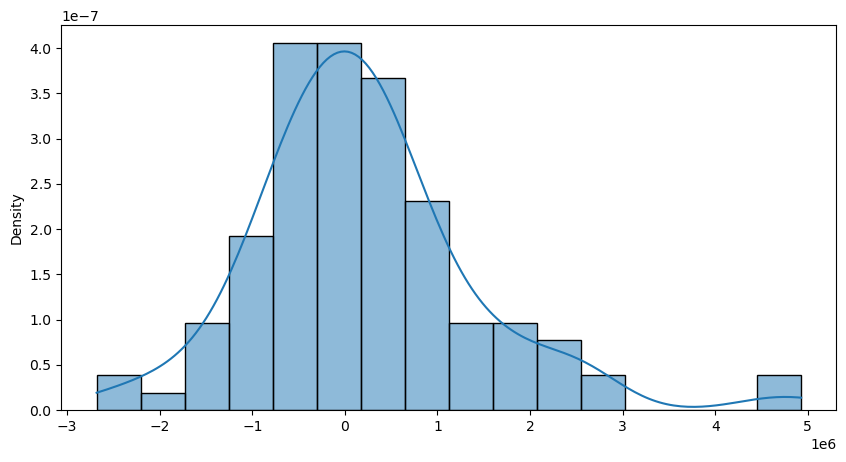

In [22]:
# Visualize residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.histplot(residuals, kde=True, stat='density');

In [23]:
# Compare predictions vs actual values
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,4753000,5.300799e+06
1,8890000,6.230172e+06
2,7455000,4.926179e+06
3,3773000,4.749386e+06
4,3780000,4.668141e+06
5,3703000,3.476165e+06
6,7910000,7.228209e+06
7,3500000,3.243253e+06
8,4098500,4.976515e+06
9,5250000,5.634982e+06


In [24]:
# Evaluate the performance of the linear regression (MAE - MSE - RMSE)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 849809.4672979289
MSE: 1467366161816.1643
RMSE: 1211348.9017686707
VarScore: 0.598561125060991


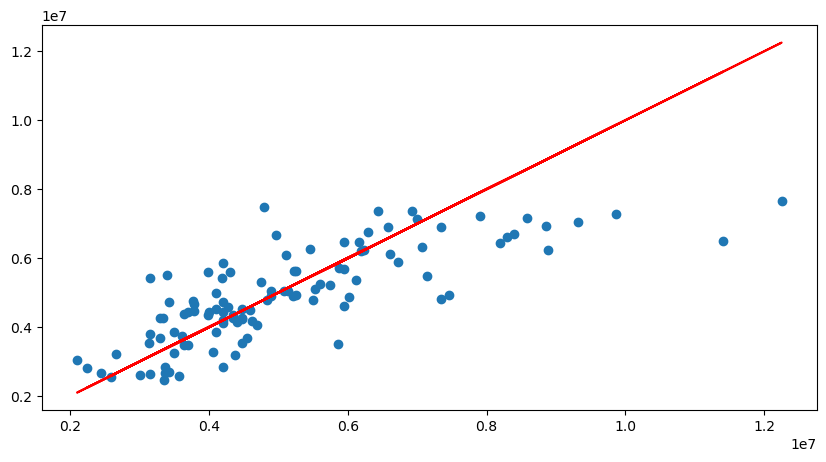

In [25]:
# Visualizing predictions (scatter plot)
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

# Perfect predictions (red line)
plt.plot(y_test,y_test,'r');

In [26]:
# Import required packages to create Neural Network Model 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [27]:
# Compile model
model = Sequential()
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mean_squared_error')

In [28]:
# Fit model and display summary
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400, verbose=0)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                441       
                                                                 
 dense_1 (Dense)             (None, 21)                462       
                                                                 
 dense_2 (Dense)             (None, 21)                462       
                                                                 
 dense_3 (Dense)             (None, 21)                462       
                                                                 
 dense_4 (Dense)             (None, 1)                 22        
                                                                 
Total params: 1,849
Trainable params: 1,849
Non-trainable params: 0
_________________________________________________________________


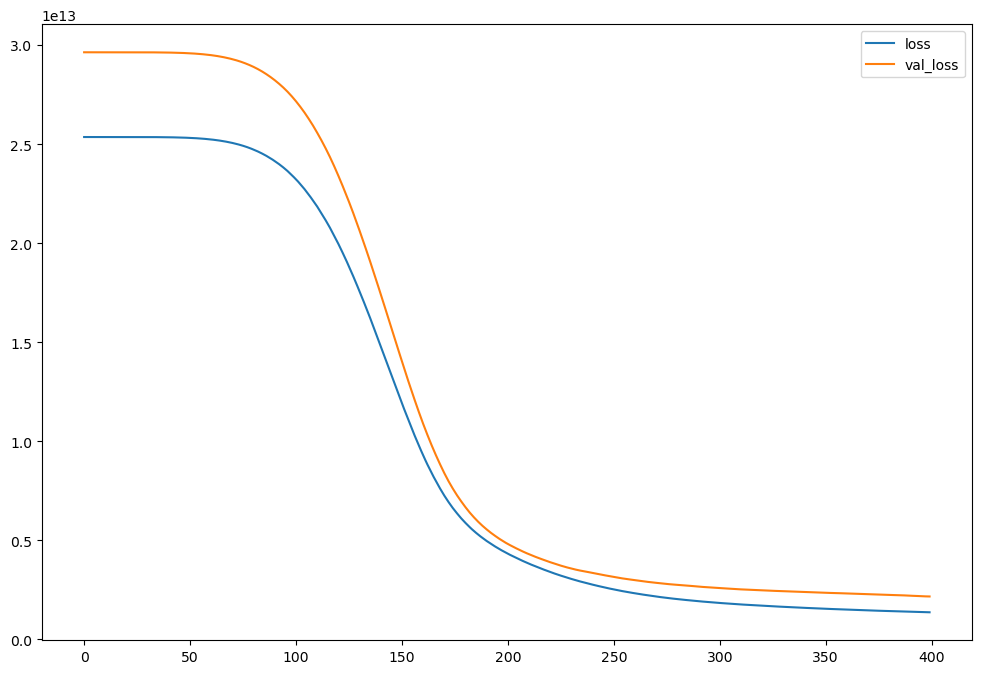

In [29]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8));

In [30]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [31]:
# Display validation statistics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 1058360.6743119266
MSE: 2171337198134.4358
RMSE: 1473545.7909866378
VarScore: 0.45994249779873986


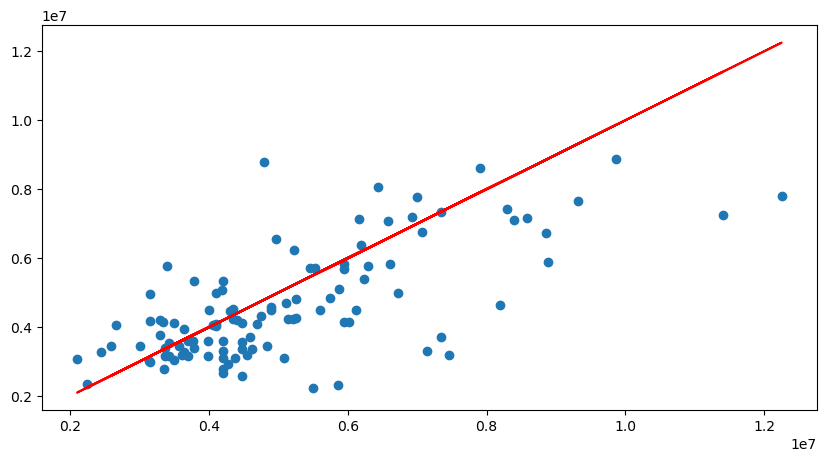

In [32]:
# Visualizing predictions (scatter plot)
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

# Perfect predictions (red line)
plt.plot(y_test,y_test,'r');

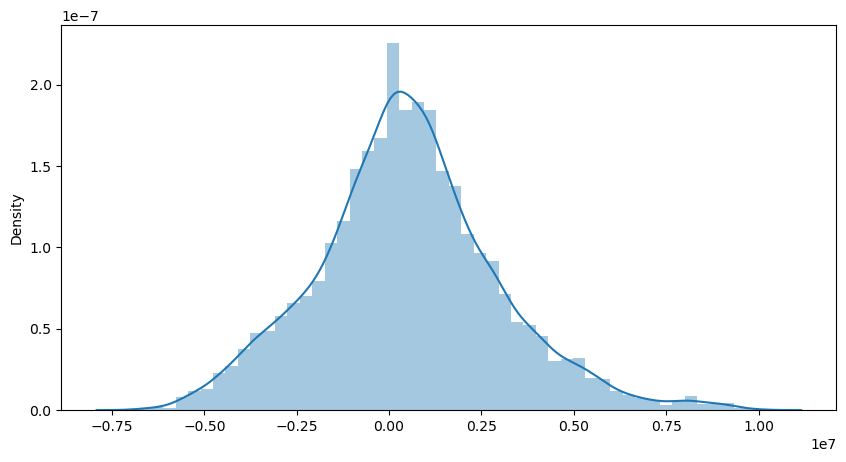

In [46]:
# Visualizing residuals
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals);